In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [69]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten, LSTM, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

## Build the dataset

In [22]:
T=10
D=1
X=[]
Y=[]

In [23]:
def get_labels(x, i1, i2, i3):   # 1- negative, 0- positive
    if(x[i1]<0 and x[i2]<0 and x[i3]<0):
        return 1
    if(x[i1]<0 and x[i2]>0 and x[i3]>0):
        return 1
    if(x[i1]>0 and x[i2]<0 and x[i3]>0):
        return 1
    if(x[i1]>0 and x[i2]<0 and x[i3]<0):
        return 1
    return 0

In [24]:
for t in range(5000):
    x=np.random.randn(T)
    X.append(x)
    y=get_labels(x, -1, -2, -3)  # short distance
#   y=get_labels(x, 0, 1, 2) # long distance
    Y.append(y)

X=np.array(X)
Y=np.array(Y)
N=len(X)

In [25]:
X.shape

(5000, 10)

## Linear Model

In [26]:
i=Input(shape=(T,))
x=Dense(1,activation='sigmoid')(i)
model=Model(i,x)

model.compile(loss='binary_crossentropy',
             optimizer=Adam(lr=0.01),
             metrics=['accuracy'])

In [28]:
r=model.fit(X, Y, epochs=100, validation_split=0.5)

Train on 2500 samples, validate on 2500 samples
Epoch 1/100
2500/2500 [==============================] - 2s 950us/sample - loss: 0.7051 - accuracy: 0.5976 - val_loss: 0.6249 - val_accuracy: 0.6820
Epoch 2/100
2500/2500 [==============================] - 0s 182us/sample - loss: 0.6162 - accuracy: 0.7080 - val_loss: 0.6123 - val_accuracy: 0.7168
Epoch 3/100
2500/2500 [==============================] - 0s 193us/sample - loss: 0.6146 - accuracy: 0.7164 - val_loss: 0.6111 - val_accuracy: 0.7188
Epoch 4/100
2500/2500 [==============================] - 0s 191us/sample - loss: 0.6147 - accuracy: 0.7096 - val_loss: 0.6110 - val_accuracy: 0.7208
Epoch 5/100
2500/2500 [==============================] - 0s 180us/sample - loss: 0.6147 - accuracy: 0.7128 - val_loss: 0.6105 - val_accuracy: 0.7248
Epoch 6/100
2500/2500 [==============================] - 0s 181us/sample - loss: 0.6146 - accuracy: 0.7100 - val_loss: 0.6111 - val_accuracy: 0.7196
Epoch 7/100
2500/2500 [==============================] - 0

2500/2500 [==============================] - 0s 192us/sample - loss: 0.6138 - accuracy: 0.7092 - val_loss: 0.6107 - val_accuracy: 0.7232
Epoch 56/100
2500/2500 [==============================] - 0s 191us/sample - loss: 0.6149 - accuracy: 0.7092 - val_loss: 0.6111 - val_accuracy: 0.7216
Epoch 57/100
2500/2500 [==============================] - 0s 189us/sample - loss: 0.6145 - accuracy: 0.7152 - val_loss: 0.6103 - val_accuracy: 0.7248
Epoch 58/100
2500/2500 [==============================] - 0s 186us/sample - loss: 0.6152 - accuracy: 0.7096 - val_loss: 0.6115 - val_accuracy: 0.7192
Epoch 59/100
2500/2500 [==============================] - 0s 192us/sample - loss: 0.6145 - accuracy: 0.7068 - val_loss: 0.6107 - val_accuracy: 0.7252
Epoch 60/100
2500/2500 [==============================] - 0s 186us/sample - loss: 0.6147 - accuracy: 0.7112 - val_loss: 0.6106 - val_accuracy: 0.7260
Epoch 61/100
2500/2500 [==============================] - 0s 190us/sample - loss: 0.6152 - accuracy: 0.7128 - val

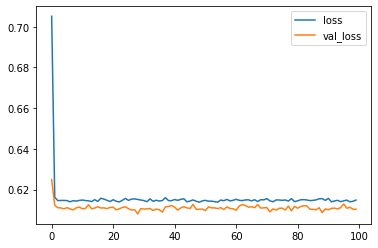

In [29]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

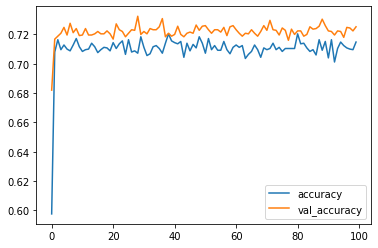

In [30]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [35]:
inputs=np.expand_dims(X,-1)  #X.reshape(-1,T,1).shape

In [37]:
i=Input(shape=(T,D))
x=SimpleRNN(5)(i)
x=Dense(1, activation='sigmoid')(x)
model=Model(i,x)
model.compile(loss='binary_crossentropy',
             #optimizer='rmsprop',
             #optimizer='adam',
             optimizer=Adam(lr=0.1),
             #optimizer=SGD(lr=0.1, momentum=0.9),
             metrics=['accuracy'])

In [38]:
r=model.fit(inputs, Y, epochs=200, validation_split=0.5)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.4866 - accuracy: 0.7288 - val_loss: 0.3489 - val_accuracy: 0.8088
Epoch 2/200
2500/2500 [==============================] - 1s 450us/sample - loss: 0.2844 - accuracy: 0.8772 - val_loss: 0.2489 - val_accuracy: 0.8960
Epoch 3/200
2500/2500 [==============================] - 1s 436us/sample - loss: 0.2643 - accuracy: 0.9056 - val_loss: 0.1620 - val_accuracy: 0.9436
Epoch 4/200
2500/2500 [==============================] - 1s 448us/sample - loss: 0.2238 - accuracy: 0.9244 - val_loss: 0.1923 - val_accuracy: 0.9432
Epoch 5/200
2500/2500 [==============================] - 1s 450us/sample - loss: 0.1619 - accuracy: 0.9452 - val_loss: 0.1441 - val_accuracy: 0.9560
Epoch 6/200
2500/2500 [==============================] - 1s 446us/sample - loss: 0.2039 - accuracy: 0.9324 - val_loss: 0.2004 - val_accuracy: 0.9228
Epoch 7/200
2500/2500 [==============================] - 1s 

2500/2500 [==============================] - 1s 438us/sample - loss: 0.6859 - accuracy: 0.7448 - val_loss: 0.5388 - val_accuracy: 0.7684
Epoch 56/200
2500/2500 [==============================] - 1s 438us/sample - loss: 0.5360 - accuracy: 0.7668 - val_loss: 0.4897 - val_accuracy: 0.7908
Epoch 57/200
2500/2500 [==============================] - 1s 440us/sample - loss: 0.4213 - accuracy: 0.8060 - val_loss: 0.3302 - val_accuracy: 0.8408
Epoch 58/200
2500/2500 [==============================] - 1s 438us/sample - loss: 0.3222 - accuracy: 0.8300 - val_loss: 0.3037 - val_accuracy: 0.8460
Epoch 59/200
2500/2500 [==============================] - 1s 444us/sample - loss: 0.2991 - accuracy: 0.8308 - val_loss: 0.2978 - val_accuracy: 0.8456
Epoch 60/200
2500/2500 [==============================] - 1s 440us/sample - loss: 0.2637 - accuracy: 0.8372 - val_loss: 0.2765 - val_accuracy: 0.8492
Epoch 61/200
2500/2500 [==============================] - 1s 436us/sample - loss: 0.2544 - accuracy: 0.8552 - val

2500/2500 [==============================] - 1s 436us/sample - loss: 0.1844 - accuracy: 0.9672 - val_loss: 0.2188 - val_accuracy: 0.9608
Epoch 110/200
2500/2500 [==============================] - 1s 438us/sample - loss: 0.1889 - accuracy: 0.9632 - val_loss: 0.1769 - val_accuracy: 0.9676
Epoch 111/200
2500/2500 [==============================] - 1s 440us/sample - loss: 0.1586 - accuracy: 0.9728 - val_loss: 0.1566 - val_accuracy: 0.9700
Epoch 112/200
2500/2500 [==============================] - 1s 432us/sample - loss: 0.1568 - accuracy: 0.9712 - val_loss: 0.1595 - val_accuracy: 0.9708
Epoch 113/200
2500/2500 [==============================] - 1s 436us/sample - loss: 0.1358 - accuracy: 0.9732 - val_loss: 0.1601 - val_accuracy: 0.9632
Epoch 114/200
2500/2500 [==============================] - 1s 432us/sample - loss: 0.1605 - accuracy: 0.9668 - val_loss: 0.1465 - val_accuracy: 0.9744
Epoch 115/200
2500/2500 [==============================] - 1s 438us/sample - loss: 0.1116 - accuracy: 0.9788

2500/2500 [==============================] - 1s 438us/sample - loss: 0.4303 - accuracy: 0.7376 - val_loss: 0.4177 - val_accuracy: 0.6364
Epoch 164/200
2500/2500 [==============================] - 1s 432us/sample - loss: 0.4187 - accuracy: 0.7356 - val_loss: 0.4282 - val_accuracy: 0.6432
Epoch 165/200
2500/2500 [==============================] - 1s 438us/sample - loss: 0.4124 - accuracy: 0.7772 - val_loss: 0.3992 - val_accuracy: 0.6520
Epoch 166/200
2500/2500 [==============================] - 1s 442us/sample - loss: 0.3979 - accuracy: 0.7916 - val_loss: 0.3851 - val_accuracy: 0.8748
Epoch 167/200
2500/2500 [==============================] - 1s 442us/sample - loss: 0.3710 - accuracy: 0.8556 - val_loss: 0.3511 - val_accuracy: 0.8996
Epoch 168/200
2500/2500 [==============================] - 1s 440us/sample - loss: 0.3365 - accuracy: 0.8960 - val_loss: 0.3382 - val_accuracy: 0.9156
Epoch 169/200
2500/2500 [==============================] - 1s 444us/sample - loss: 0.2449 - accuracy: 0.9400

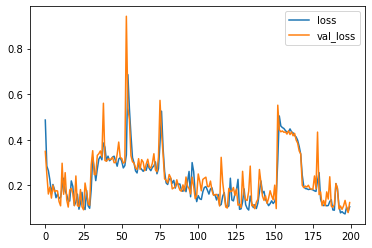

In [39]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

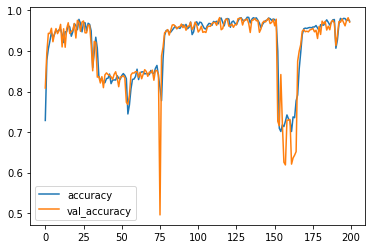

In [40]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

## Converting to Long distance problem

In [42]:
T=10
D=1
X=[]
Y=[]

for t in range(5000):
    x=np.random.randn(T)
    X.append(x)
    y=get_labels(x, 0, 1, 2) #long distance
    Y.append(y)
X=np.array(X)
Y=np.array(Y)
N=len(X)

In [43]:
inputs=np.expand_dims(X,-1)  #X.reshape(-1,T,1).shape

# RNN

In [44]:
i=Input(shape=(T,D))
x=SimpleRNN(5)(i)
x=Dense(1, activation='sigmoid')(x)
model=Model(i,x)
model.compile(loss='binary_crossentropy',
             optimizer=Adam(lr=0.1),
             metrics=['accuracy'])

In [45]:
r=model.fit(inputs, Y, epochs=200, validation_split=0.5)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.7100 - accuracy: 0.4868 - val_loss: 0.6979 - val_accuracy: 0.5080
Epoch 2/200
2500/2500 [==============================] - 1s 444us/sample - loss: 0.6984 - accuracy: 0.5088 - val_loss: 0.7034 - val_accuracy: 0.5104
Epoch 3/200
2500/2500 [==============================] - 1s 444us/sample - loss: 0.6969 - accuracy: 0.5124 - val_loss: 0.7005 - val_accuracy: 0.4948
Epoch 4/200
2500/2500 [==============================] - 1s 452us/sample - loss: 0.7029 - accuracy: 0.4968 - val_loss: 0.7326 - val_accuracy: 0.5048
Epoch 5/200
2500/2500 [==============================] - 1s 464us/sample - loss: 0.7094 - accuracy: 0.4884 - val_loss: 0.7078 - val_accuracy: 0.4904
Epoch 6/200
2500/2500 [==============================] - 1s 454us/sample - loss: 0.7028 - accuracy: 0.5144 - val_loss: 0.6933 - val_accuracy: 0.5012
Epoch 7/200
2500/2500 [==============================] - 1s 

2500/2500 [==============================] - 1s 464us/sample - loss: 0.7092 - accuracy: 0.4836 - val_loss: 0.6995 - val_accuracy: 0.5016
Epoch 56/200
2500/2500 [==============================] - 1s 458us/sample - loss: 0.7027 - accuracy: 0.5072 - val_loss: 0.6951 - val_accuracy: 0.4920
Epoch 57/200
2500/2500 [==============================] - 1s 458us/sample - loss: 0.7002 - accuracy: 0.5008 - val_loss: 0.6961 - val_accuracy: 0.5136
Epoch 58/200
2500/2500 [==============================] - 1s 454us/sample - loss: 0.7089 - accuracy: 0.5060 - val_loss: 0.6986 - val_accuracy: 0.5148
Epoch 59/200
2500/2500 [==============================] - 1s 456us/sample - loss: 0.7091 - accuracy: 0.4948 - val_loss: 0.6976 - val_accuracy: 0.5068
Epoch 60/200
2500/2500 [==============================] - 1s 452us/sample - loss: 0.7067 - accuracy: 0.5004 - val_loss: 0.7043 - val_accuracy: 0.5048
Epoch 61/200
2500/2500 [==============================] - 1s 454us/sample - loss: 0.7058 - accuracy: 0.4876 - val

2500/2500 [==============================] - 1s 434us/sample - loss: 0.7005 - accuracy: 0.5272 - val_loss: 0.7150 - val_accuracy: 0.5096
Epoch 110/200
2500/2500 [==============================] - 1s 434us/sample - loss: 0.7025 - accuracy: 0.5148 - val_loss: 0.7595 - val_accuracy: 0.5112
Epoch 111/200
2500/2500 [==============================] - 1s 442us/sample - loss: 0.7107 - accuracy: 0.5080 - val_loss: 0.7037 - val_accuracy: 0.5100
Epoch 112/200
2500/2500 [==============================] - 1s 438us/sample - loss: 0.7028 - accuracy: 0.5004 - val_loss: 0.6983 - val_accuracy: 0.4920
Epoch 113/200
2500/2500 [==============================] - 1s 438us/sample - loss: 0.7047 - accuracy: 0.5020 - val_loss: 0.6938 - val_accuracy: 0.5124
Epoch 114/200
2500/2500 [==============================] - 1s 440us/sample - loss: 0.7017 - accuracy: 0.5012 - val_loss: 0.6964 - val_accuracy: 0.5176
Epoch 115/200
2500/2500 [==============================] - 1s 442us/sample - loss: 0.6993 - accuracy: 0.5048

2500/2500 [==============================] - 1s 444us/sample - loss: 0.6989 - accuracy: 0.5076 - val_loss: 0.7068 - val_accuracy: 0.5168
Epoch 164/200
2500/2500 [==============================] - 1s 444us/sample - loss: 0.6994 - accuracy: 0.5184 - val_loss: 0.6951 - val_accuracy: 0.5352
Epoch 165/200
2500/2500 [==============================] - 1s 436us/sample - loss: 0.7078 - accuracy: 0.5028 - val_loss: 0.7034 - val_accuracy: 0.5140
Epoch 166/200
2500/2500 [==============================] - 1s 442us/sample - loss: 0.7045 - accuracy: 0.4920 - val_loss: 0.6955 - val_accuracy: 0.4900
Epoch 167/200
2500/2500 [==============================] - 1s 440us/sample - loss: 0.7043 - accuracy: 0.4940 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 168/200
2500/2500 [==============================] - 1s 442us/sample - loss: 0.7033 - accuracy: 0.5160 - val_loss: 0.6997 - val_accuracy: 0.5104
Epoch 169/200
2500/2500 [==============================] - 1s 444us/sample - loss: 0.7051 - accuracy: 0.5132

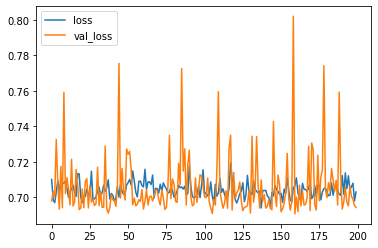

In [46]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

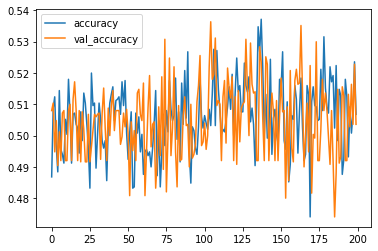

In [47]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

# LSTM

In [58]:
i=Input(shape=(T,D))
x=LSTM(5)(i)
x=Dense(1, activation='sigmoid')(x)
model=Model(i,x)
model.compile(loss='binary_crossentropy',
             optimizer=Adam(lr=0.01),
             metrics=['accuracy'])

In [59]:
r=model.fit(inputs, Y, epochs=200, validation_split=0.5)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6941 - accuracy: 0.5096 - val_loss: 0.6932 - val_accuracy: 0.4940
Epoch 2/200
2500/2500 [==============================] - 1s 300us/sample - loss: 0.6937 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5028
Epoch 3/200
2500/2500 [==============================] - 1s 300us/sample - loss: 0.6934 - accuracy: 0.4968 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 4/200
2500/2500 [==============================] - 1s 300us/sample - loss: 0.6931 - accuracy: 0.5076 - val_loss: 0.6930 - val_accuracy: 0.5164
Epoch 5/200
2500/2500 [==============================] - 1s 300us/sample - loss: 0.6934 - accuracy: 0.5076 - val_loss: 0.6926 - val_accuracy: 0.5220
Epoch 6/200
2500/2500 [==============================] - 1s 300us/sample - loss: 0.6909 - accuracy: 0.5332 - val_loss: 0.6890 - val_accuracy: 0.5472
Epoch 7/200
2500/2500 [==============================] - 1s 

2500/2500 [==============================] - 1s 294us/sample - loss: 0.6856 - accuracy: 0.5316 - val_loss: 0.6893 - val_accuracy: 0.5020
Epoch 56/200
2500/2500 [==============================] - 1s 294us/sample - loss: 0.6850 - accuracy: 0.5308 - val_loss: 0.6889 - val_accuracy: 0.5044
Epoch 57/200
2500/2500 [==============================] - 1s 294us/sample - loss: 0.6847 - accuracy: 0.5288 - val_loss: 0.6888 - val_accuracy: 0.5044
Epoch 58/200
2500/2500 [==============================] - 1s 294us/sample - loss: 0.6689 - accuracy: 0.5536 - val_loss: 0.6642 - val_accuracy: 0.5676
Epoch 59/200
2500/2500 [==============================] - 1s 294us/sample - loss: 0.6434 - accuracy: 0.5936 - val_loss: 0.6624 - val_accuracy: 0.5724
Epoch 60/200
2500/2500 [==============================] - 1s 296us/sample - loss: 0.6406 - accuracy: 0.6012 - val_loss: 0.6620 - val_accuracy: 0.5740
Epoch 61/200
2500/2500 [==============================] - 1s 308us/sample - loss: 0.6403 - accuracy: 0.5980 - val

2500/2500 [==============================] - 1s 296us/sample - loss: 0.6864 - accuracy: 0.5528 - val_loss: 0.6899 - val_accuracy: 0.5460
Epoch 110/200
2500/2500 [==============================] - 1s 294us/sample - loss: 0.6865 - accuracy: 0.5560 - val_loss: 0.6901 - val_accuracy: 0.5392
Epoch 111/200
2500/2500 [==============================] - 1s 296us/sample - loss: 0.6861 - accuracy: 0.5488 - val_loss: 0.6902 - val_accuracy: 0.5412
Epoch 112/200
2500/2500 [==============================] - 1s 294us/sample - loss: 0.6865 - accuracy: 0.5556 - val_loss: 0.6914 - val_accuracy: 0.5432
Epoch 113/200
2500/2500 [==============================] - 1s 290us/sample - loss: 0.6861 - accuracy: 0.5528 - val_loss: 0.6911 - val_accuracy: 0.5356
Epoch 114/200
2500/2500 [==============================] - 1s 288us/sample - loss: 0.6858 - accuracy: 0.5452 - val_loss: 0.6912 - val_accuracy: 0.5460
Epoch 115/200
2500/2500 [==============================] - 1s 294us/sample - loss: 0.6854 - accuracy: 0.5524

2500/2500 [==============================] - 1s 302us/sample - loss: 0.6592 - accuracy: 0.6020 - val_loss: 0.6843 - val_accuracy: 0.5840
Epoch 164/200
2500/2500 [==============================] - 1s 286us/sample - loss: 0.6550 - accuracy: 0.6116 - val_loss: 0.6841 - val_accuracy: 0.5896
Epoch 165/200
2500/2500 [==============================] - 1s 284us/sample - loss: 0.6543 - accuracy: 0.6120 - val_loss: 0.6888 - val_accuracy: 0.5804
Epoch 166/200
2500/2500 [==============================] - 1s 290us/sample - loss: 0.6592 - accuracy: 0.6020 - val_loss: 0.6905 - val_accuracy: 0.5732
Epoch 167/200
2500/2500 [==============================] - 1s 286us/sample - loss: 0.6596 - accuracy: 0.6016 - val_loss: 0.6887 - val_accuracy: 0.5784
Epoch 168/200
2500/2500 [==============================] - 1s 288us/sample - loss: 0.6596 - accuracy: 0.6036 - val_loss: 0.6898 - val_accuracy: 0.5708
Epoch 169/200
2500/2500 [==============================] - 1s 288us/sample - loss: 0.6602 - accuracy: 0.5972

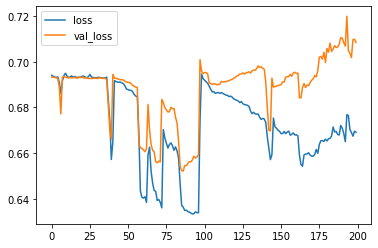

In [60]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

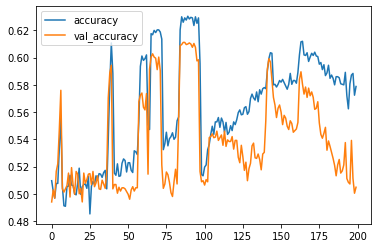

In [61]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [62]:
T=20
D=1
X=[]
Y=[]

for t in range(5000):
    x=np.random.randn(T)
    X.append(x)
    y=get_labels(x, 0, 1, 2) #long distance
    Y.append(y)
X=np.array(X)
Y=np.array(Y)
N=len(X)

In [63]:
inputs=np.expand_dims(X,-1)  #X.reshape(-1,T,1).shape

In [64]:
i=Input(shape=(T,D))
x=LSTM(5)(i)
x=Dense(1, activation='sigmoid')(x)
model=Model(i,x)
model.compile(loss='binary_crossentropy',
             optimizer=Adam(lr=0.01),
             metrics=['accuracy'])

In [65]:
r=model.fit(inputs, Y, epochs=200, validation_split=0.5)

Train on 2500 samples, validate on 2500 samples
Epoch 1/200
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6945 - accuracy: 0.4972 - val_loss: 0.6926 - val_accuracy: 0.5128
Epoch 2/200
2500/2500 [==============================] - 1s 292us/sample - loss: 0.6889 - accuracy: 0.5332 - val_loss: 0.6881 - val_accuracy: 0.5612
Epoch 3/200
2500/2500 [==============================] - 1s 294us/sample - loss: 0.6841 - accuracy: 0.5596 - val_loss: 0.6762 - val_accuracy: 0.5704
Epoch 4/200
2500/2500 [==============================] - 1s 290us/sample - loss: 0.6882 - accuracy: 0.5412 - val_loss: 0.6873 - val_accuracy: 0.5492
Epoch 5/200
2500/2500 [==============================] - 1s 288us/sample - loss: 0.6883 - accuracy: 0.5368 - val_loss: 0.6832 - val_accuracy: 0.5588
Epoch 6/200
2500/2500 [==============================] - 1s 292us/sample - loss: 0.6845 - accuracy: 0.5608 - val_loss: 0.6820 - val_accuracy: 0.5628
Epoch 7/200
2500/2500 [==============================] - 1s 

2500/2500 [==============================] - 1s 292us/sample - loss: 0.6875 - accuracy: 0.5364 - val_loss: 0.6991 - val_accuracy: 0.4944
Epoch 56/200
2500/2500 [==============================] - 1s 298us/sample - loss: 0.6868 - accuracy: 0.5420 - val_loss: 0.6953 - val_accuracy: 0.5144
Epoch 57/200
2500/2500 [==============================] - 1s 294us/sample - loss: 0.6835 - accuracy: 0.5596 - val_loss: 0.6905 - val_accuracy: 0.5300
Epoch 58/200
2500/2500 [==============================] - 1s 296us/sample - loss: 0.6738 - accuracy: 0.5732 - val_loss: 0.6660 - val_accuracy: 0.5772
Epoch 59/200
2500/2500 [==============================] - 1s 290us/sample - loss: 0.6167 - accuracy: 0.6336 - val_loss: 0.6138 - val_accuracy: 0.6312
Epoch 60/200
2500/2500 [==============================] - 1s 300us/sample - loss: 0.5903 - accuracy: 0.6592 - val_loss: 0.5953 - val_accuracy: 0.6480
Epoch 61/200
2500/2500 [==============================] - 1s 304us/sample - loss: 0.5925 - accuracy: 0.6736 - val

2500/2500 [==============================] - 1s 286us/sample - loss: 0.0953 - accuracy: 0.9624 - val_loss: 0.1120 - val_accuracy: 0.9568
Epoch 110/200
2500/2500 [==============================] - 1s 296us/sample - loss: 0.0924 - accuracy: 0.9672 - val_loss: 0.1244 - val_accuracy: 0.9500
Epoch 111/200
2500/2500 [==============================] - 1s 288us/sample - loss: 0.0791 - accuracy: 0.9740 - val_loss: 0.1078 - val_accuracy: 0.9588
Epoch 112/200
2500/2500 [==============================] - 1s 290us/sample - loss: 0.0972 - accuracy: 0.9644 - val_loss: 0.0879 - val_accuracy: 0.9672
Epoch 113/200
2500/2500 [==============================] - 1s 288us/sample - loss: 0.0807 - accuracy: 0.9724 - val_loss: 0.0942 - val_accuracy: 0.9640
Epoch 114/200
2500/2500 [==============================] - 1s 288us/sample - loss: 0.0844 - accuracy: 0.9716 - val_loss: 0.0816 - val_accuracy: 0.9680
Epoch 115/200
2500/2500 [==============================] - 1s 290us/sample - loss: 0.0753 - accuracy: 0.9716

2500/2500 [==============================] - 1s 300us/sample - loss: 0.0304 - accuracy: 0.9876 - val_loss: 0.0552 - val_accuracy: 0.9836
Epoch 164/200
2500/2500 [==============================] - 1s 302us/sample - loss: 0.0305 - accuracy: 0.9892 - val_loss: 0.0449 - val_accuracy: 0.9844
Epoch 165/200
2500/2500 [==============================] - 1s 300us/sample - loss: 0.0320 - accuracy: 0.9876 - val_loss: 0.0598 - val_accuracy: 0.9796
Epoch 166/200
2500/2500 [==============================] - 1s 300us/sample - loss: 0.0401 - accuracy: 0.9836 - val_loss: 0.0545 - val_accuracy: 0.9816
Epoch 167/200
2500/2500 [==============================] - 1s 298us/sample - loss: 0.0317 - accuracy: 0.9860 - val_loss: 0.0443 - val_accuracy: 0.9860
Epoch 168/200
2500/2500 [==============================] - 1s 298us/sample - loss: 0.0296 - accuracy: 0.9888 - val_loss: 0.0631 - val_accuracy: 0.9756
Epoch 169/200
2500/2500 [==============================] - 1s 300us/sample - loss: 0.0514 - accuracy: 0.9792

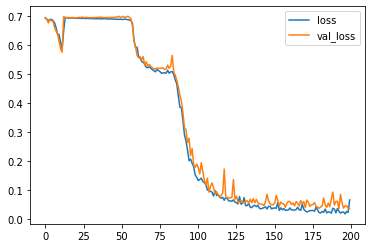

In [66]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

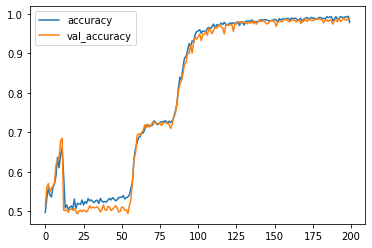

In [67]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [70]:
i=Input(shape=(T,D))
x=GRU(5)(i)
x=Dense(1, activation='sigmoid')(x)
model=Model(i,x)
model.compile(loss='binary_crossentropy',
             optimizer=Adam(lr=0.01),
             metrics=['accuracy'])

In [71]:
r=model.fit(inputs, Y, epochs=400, validation_split=0.5)

Train on 2500 samples, validate on 2500 samples
Epoch 1/400
2500/2500 [==============================] - 3s 1ms/sample - loss: 0.6963 - accuracy: 0.4916 - val_loss: 0.6939 - val_accuracy: 0.5056
Epoch 2/400
2500/2500 [==============================] - 1s 318us/sample - loss: 0.6944 - accuracy: 0.5056 - val_loss: 0.6939 - val_accuracy: 0.4968
Epoch 3/400
2500/2500 [==============================] - 1s 284us/sample - loss: 0.6948 - accuracy: 0.4948 - val_loss: 0.6928 - val_accuracy: 0.5120
Epoch 4/400
2500/2500 [==============================] - 1s 326us/sample - loss: 0.6923 - accuracy: 0.5260 - val_loss: 0.6976 - val_accuracy: 0.4940
Epoch 5/400
2500/2500 [==============================] - 1s 328us/sample - loss: 0.6940 - accuracy: 0.4956 - val_loss: 0.6934 - val_accuracy: 0.4940
Epoch 6/400
2500/2500 [==============================] - 1s 298us/sample - loss: 0.6936 - accuracy: 0.5048 - val_loss: 0.6940 - val_accuracy: 0.5040
Epoch 7/400
2500/2500 [==============================] - 1s 

2500/2500 [==============================] - 1s 342us/sample - loss: 0.6928 - accuracy: 0.5180 - val_loss: 0.6942 - val_accuracy: 0.5060
Epoch 56/400
2500/2500 [==============================] - 1s 326us/sample - loss: 0.6923 - accuracy: 0.5148 - val_loss: 0.6948 - val_accuracy: 0.5012
Epoch 57/400
2500/2500 [==============================] - 1s 314us/sample - loss: 0.6919 - accuracy: 0.5156 - val_loss: 0.6951 - val_accuracy: 0.5072
Epoch 58/400
2500/2500 [==============================] - 1s 304us/sample - loss: 0.6912 - accuracy: 0.5256 - val_loss: 0.6947 - val_accuracy: 0.5056
Epoch 59/400
2500/2500 [==============================] - 1s 306us/sample - loss: 0.6913 - accuracy: 0.5164 - val_loss: 0.6961 - val_accuracy: 0.5084
Epoch 60/400
2500/2500 [==============================] - 1s 300us/sample - loss: 0.6908 - accuracy: 0.5176 - val_loss: 0.6969 - val_accuracy: 0.4988
Epoch 61/400
2500/2500 [==============================] - 1s 318us/sample - loss: 0.6902 - accuracy: 0.5252 - val

2500/2500 [==============================] - 1s 302us/sample - loss: 0.6145 - accuracy: 0.6560 - val_loss: 0.6081 - val_accuracy: 0.6596
Epoch 110/400
2500/2500 [==============================] - 1s 306us/sample - loss: 0.5927 - accuracy: 0.6768 - val_loss: 0.5917 - val_accuracy: 0.6744
Epoch 111/400
2500/2500 [==============================] - 1s 298us/sample - loss: 0.5958 - accuracy: 0.6844 - val_loss: 0.6063 - val_accuracy: 0.6560
Epoch 112/400
2500/2500 [==============================] - 1s 284us/sample - loss: 0.6003 - accuracy: 0.6636 - val_loss: 0.5871 - val_accuracy: 0.6760
Epoch 113/400
2500/2500 [==============================] - 1s 294us/sample - loss: 0.5771 - accuracy: 0.6872 - val_loss: 0.5915 - val_accuracy: 0.6780
Epoch 114/400
2500/2500 [==============================] - 1s 294us/sample - loss: 0.5802 - accuracy: 0.6944 - val_loss: 0.5835 - val_accuracy: 0.6796
Epoch 115/400
2500/2500 [==============================] - 1s 304us/sample - loss: 0.5682 - accuracy: 0.6980

2500/2500 [==============================] - 1s 326us/sample - loss: 0.4219 - accuracy: 0.7972 - val_loss: 0.3721 - val_accuracy: 0.8200
Epoch 164/400
2500/2500 [==============================] - 1s 328us/sample - loss: 0.3629 - accuracy: 0.8320 - val_loss: 0.3952 - val_accuracy: 0.7976
Epoch 165/400
2500/2500 [==============================] - 1s 327us/sample - loss: 0.3883 - accuracy: 0.8012 - val_loss: 0.3703 - val_accuracy: 0.8116
Epoch 166/400
2500/2500 [==============================] - 1s 328us/sample - loss: 0.3579 - accuracy: 0.8300 - val_loss: 0.3520 - val_accuracy: 0.8304
Epoch 167/400
2500/2500 [==============================] - 1s 324us/sample - loss: 0.3543 - accuracy: 0.8332 - val_loss: 0.3596 - val_accuracy: 0.8152
Epoch 168/400
2500/2500 [==============================] - 1s 314us/sample - loss: 0.3419 - accuracy: 0.8388 - val_loss: 0.3543 - val_accuracy: 0.8252
Epoch 169/400
2500/2500 [==============================] - 1s 312us/sample - loss: 0.3365 - accuracy: 0.8420

2500/2500 [==============================] - 1s 296us/sample - loss: 0.1145 - accuracy: 0.9612 - val_loss: 0.1266 - val_accuracy: 0.9596
Epoch 218/400
2500/2500 [==============================] - 1s 288us/sample - loss: 0.1106 - accuracy: 0.9616 - val_loss: 0.1201 - val_accuracy: 0.9616
Epoch 219/400
2500/2500 [==============================] - 1s 288us/sample - loss: 0.1014 - accuracy: 0.9656 - val_loss: 0.1137 - val_accuracy: 0.9628
Epoch 220/400
2500/2500 [==============================] - 1s 329us/sample - loss: 0.0988 - accuracy: 0.9652 - val_loss: 0.1095 - val_accuracy: 0.9648
Epoch 221/400
2500/2500 [==============================] - 1s 347us/sample - loss: 0.1028 - accuracy: 0.9652 - val_loss: 0.1430 - val_accuracy: 0.9528
Epoch 222/400
2500/2500 [==============================] - 1s 298us/sample - loss: 0.1319 - accuracy: 0.9556 - val_loss: 0.1438 - val_accuracy: 0.9488
Epoch 223/400
2500/2500 [==============================] - 1s 346us/sample - loss: 0.1122 - accuracy: 0.9624

2500/2500 [==============================] - 1s 318us/sample - loss: 0.0307 - accuracy: 0.9880 - val_loss: 0.0409 - val_accuracy: 0.9900
Epoch 272/400
2500/2500 [==============================] - 1s 322us/sample - loss: 0.0264 - accuracy: 0.9904 - val_loss: 0.0373 - val_accuracy: 0.9900
Epoch 273/400
2500/2500 [==============================] - 1s 328us/sample - loss: 0.0244 - accuracy: 0.9904 - val_loss: 0.0387 - val_accuracy: 0.9908
Epoch 274/400
2500/2500 [==============================] - 1s 324us/sample - loss: 0.0257 - accuracy: 0.9904 - val_loss: 0.0485 - val_accuracy: 0.9840
Epoch 275/400
2500/2500 [==============================] - 1s 314us/sample - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0360 - val_accuracy: 0.9908
Epoch 276/400
2500/2500 [==============================] - 1s 315us/sample - loss: 0.0232 - accuracy: 0.9932 - val_loss: 0.0442 - val_accuracy: 0.9880
Epoch 277/400
2500/2500 [==============================] - 1s 312us/sample - loss: 0.0257 - accuracy: 0.9908

2500/2500 [==============================] - 1s 329us/sample - loss: 0.0173 - accuracy: 0.9960 - val_loss: 0.0097 - val_accuracy: 0.9968
Epoch 326/400
2500/2500 [==============================] - 1s 318us/sample - loss: 0.0207 - accuracy: 0.9928 - val_loss: 0.0116 - val_accuracy: 0.9968
Epoch 327/400
2500/2500 [==============================] - 1s 336us/sample - loss: 0.0161 - accuracy: 0.9956 - val_loss: 0.0161 - val_accuracy: 0.9968
Epoch 328/400
2500/2500 [==============================] - 1s 338us/sample - loss: 0.0184 - accuracy: 0.9944 - val_loss: 0.0112 - val_accuracy: 0.9976
Epoch 329/400
2500/2500 [==============================] - 1s 313us/sample - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.0116 - val_accuracy: 0.9976
Epoch 330/400
2500/2500 [==============================] - 1s 297us/sample - loss: 0.0134 - accuracy: 0.9968 - val_loss: 0.0088 - val_accuracy: 0.9968
Epoch 331/400
2500/2500 [==============================] - 1s 302us/sample - loss: 0.0160 - accuracy: 0.9944

2500/2500 [==============================] - 1s 288us/sample - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.0126 - val_accuracy: 0.9948
Epoch 380/400
2500/2500 [==============================] - 1s 288us/sample - loss: 0.0112 - accuracy: 0.9948 - val_loss: 0.0040 - val_accuracy: 0.9992
Epoch 381/400
2500/2500 [==============================] - 1s 290us/sample - loss: 0.0299 - accuracy: 0.9916 - val_loss: 0.0057 - val_accuracy: 0.9976
Epoch 382/400
2500/2500 [==============================] - 1s 292us/sample - loss: 0.0088 - accuracy: 0.9964 - val_loss: 0.0037 - val_accuracy: 0.9992
Epoch 383/400
2500/2500 [==============================] - 1s 298us/sample - loss: 0.0059 - accuracy: 0.9976 - val_loss: 0.0034 - val_accuracy: 0.9988
Epoch 384/400
2500/2500 [==============================] - 1s 294us/sample - loss: 0.0076 - accuracy: 0.9968 - val_loss: 0.0059 - val_accuracy: 0.9976
Epoch 385/400
2500/2500 [==============================] - 1s 300us/sample - loss: 0.0076 - accuracy: 0.9968

In [72]:
T=30
D=1
X=[]
Y=[]

for t in range(5000):
    x=np.random.randn(T)
    X.append(x)
    y=get_labels(x, 0, 1, 2) #long distance
    Y.append(y)
X=np.array(X)
Y=np.array(Y)
N=len(X)

In [73]:
inputs=np.expand_dims(X,-1)  #X.reshape(-1,T,1).shape

In [74]:
i=Input(shape=(T,D))
x=LSTM(5)(i)
x=Dense(1, activation='sigmoid')(x)
model=Model(i,x)
model.compile(loss='binary_crossentropy',
             optimizer=Adam(lr=0.01),
             metrics=['accuracy'])

In [75]:
r=model.fit(inputs, Y, epochs=400, validation_split=0.5)

Train on 2500 samples, validate on 2500 samples
Epoch 1/400
2500/2500 [==============================] - 4s 2ms/sample - loss: 0.6947 - accuracy: 0.4904 - val_loss: 0.6930 - val_accuracy: 0.5060
Epoch 2/400
2500/2500 [==============================] - 1s 320us/sample - loss: 0.6936 - accuracy: 0.4984 - val_loss: 0.6928 - val_accuracy: 0.5056
Epoch 3/400
2500/2500 [==============================] - 1s 322us/sample - loss: 0.6930 - accuracy: 0.5040 - val_loss: 0.6939 - val_accuracy: 0.4912
Epoch 4/400
2500/2500 [==============================] - 1s 338us/sample - loss: 0.6920 - accuracy: 0.5228 - val_loss: 0.6928 - val_accuracy: 0.5208
Epoch 5/400
2500/2500 [==============================] - 1s 334us/sample - loss: 0.6925 - accuracy: 0.5200 - val_loss: 0.6930 - val_accuracy: 0.5164
Epoch 6/400
2500/2500 [==============================] - 1s 330us/sample - loss: 0.6921 - accuracy: 0.5132 - val_loss: 0.6933 - val_accuracy: 0.5120
Epoch 7/400
2500/2500 [==============================] - 1s 

2500/2500 [==============================] - 1s 328us/sample - loss: 0.6746 - accuracy: 0.5732 - val_loss: 0.7023 - val_accuracy: 0.5068
Epoch 56/400
2500/2500 [==============================] - 1s 318us/sample - loss: 0.6771 - accuracy: 0.5696 - val_loss: 0.7064 - val_accuracy: 0.4964
Epoch 57/400
2500/2500 [==============================] - 1s 314us/sample - loss: 0.6743 - accuracy: 0.5780 - val_loss: 0.7047 - val_accuracy: 0.5024
Epoch 58/400
2500/2500 [==============================] - 1s 324us/sample - loss: 0.6752 - accuracy: 0.5792 - val_loss: 0.7069 - val_accuracy: 0.5064
Epoch 59/400
2500/2500 [==============================] - 1s 316us/sample - loss: 0.6745 - accuracy: 0.5824 - val_loss: 0.7068 - val_accuracy: 0.5032
Epoch 60/400
2500/2500 [==============================] - 1s 312us/sample - loss: 0.6735 - accuracy: 0.5712 - val_loss: 0.7053 - val_accuracy: 0.5104
Epoch 61/400
2500/2500 [==============================] - 1s 340us/sample - loss: 0.6708 - accuracy: 0.5788 - val

2500/2500 [==============================] - 1s 346us/sample - loss: 0.6666 - accuracy: 0.5940 - val_loss: 0.7225 - val_accuracy: 0.5012
Epoch 110/400
2500/2500 [==============================] - 1s 346us/sample - loss: 0.7064 - accuracy: 0.5268 - val_loss: 0.7206 - val_accuracy: 0.4940
Epoch 111/400
2500/2500 [==============================] - 1s 348us/sample - loss: 0.7091 - accuracy: 0.4932 - val_loss: 0.7055 - val_accuracy: 0.4952
Epoch 112/400
2500/2500 [==============================] - 1s 335us/sample - loss: 0.6962 - accuracy: 0.5064 - val_loss: 0.7004 - val_accuracy: 0.5056
Epoch 113/400
2500/2500 [==============================] - 1s 322us/sample - loss: 0.6933 - accuracy: 0.5076 - val_loss: 0.6968 - val_accuracy: 0.5044
Epoch 114/400
2500/2500 [==============================] - 1s 379us/sample - loss: 0.6916 - accuracy: 0.5248 - val_loss: 0.6951 - val_accuracy: 0.5052
Epoch 115/400
2500/2500 [==============================] - 1s 313us/sample - loss: 0.6932 - accuracy: 0.5172

2500/2500 [==============================] - 1s 335us/sample - loss: 0.6898 - accuracy: 0.5396 - val_loss: 0.6959 - val_accuracy: 0.4948
Epoch 164/400
2500/2500 [==============================] - 1s 336us/sample - loss: 0.6899 - accuracy: 0.5308 - val_loss: 0.6975 - val_accuracy: 0.4908
Epoch 165/400
2500/2500 [==============================] - 1s 336us/sample - loss: 0.6898 - accuracy: 0.5340 - val_loss: 0.6953 - val_accuracy: 0.5112
Epoch 166/400
2500/2500 [==============================] - 1s 332us/sample - loss: 0.6899 - accuracy: 0.5260 - val_loss: 0.6955 - val_accuracy: 0.4996
Epoch 167/400
2500/2500 [==============================] - 1s 333us/sample - loss: 0.6897 - accuracy: 0.5356 - val_loss: 0.6945 - val_accuracy: 0.5148
Epoch 168/400
2500/2500 [==============================] - 1s 320us/sample - loss: 0.6886 - accuracy: 0.5400 - val_loss: 0.6969 - val_accuracy: 0.5068
Epoch 169/400
2500/2500 [==============================] - 1s 326us/sample - loss: 0.6891 - accuracy: 0.5264

2500/2500 [==============================] - 1s 341us/sample - loss: 0.4994 - accuracy: 0.7336 - val_loss: 0.5104 - val_accuracy: 0.7232
Epoch 218/400
2500/2500 [==============================] - 1s 339us/sample - loss: 0.5015 - accuracy: 0.7344 - val_loss: 0.5059 - val_accuracy: 0.7316
Epoch 219/400
2500/2500 [==============================] - 1s 344us/sample - loss: 0.4926 - accuracy: 0.7396 - val_loss: 0.5091 - val_accuracy: 0.7228
Epoch 220/400
2500/2500 [==============================] - 1s 351us/sample - loss: 0.4932 - accuracy: 0.7384 - val_loss: 0.5080 - val_accuracy: 0.7292
Epoch 221/400
2500/2500 [==============================] - 1s 333us/sample - loss: 0.4979 - accuracy: 0.7388 - val_loss: 0.5186 - val_accuracy: 0.7224
Epoch 222/400
2500/2500 [==============================] - 1s 324us/sample - loss: 0.4994 - accuracy: 0.7372 - val_loss: 0.5111 - val_accuracy: 0.7200
Epoch 223/400
2500/2500 [==============================] - 1s 323us/sample - loss: 0.4982 - accuracy: 0.7368

2500/2500 [==============================] - 1s 309us/sample - loss: 0.4754 - accuracy: 0.7528 - val_loss: 0.4884 - val_accuracy: 0.7448
Epoch 272/400
2500/2500 [==============================] - 1s 319us/sample - loss: 0.4761 - accuracy: 0.7492 - val_loss: 0.4981 - val_accuracy: 0.7344
Epoch 273/400
2500/2500 [==============================] - 1s 320us/sample - loss: 0.4797 - accuracy: 0.7484 - val_loss: 0.4950 - val_accuracy: 0.7368
Epoch 274/400
2500/2500 [==============================] - 1s 320us/sample - loss: 0.4753 - accuracy: 0.7516 - val_loss: 0.4935 - val_accuracy: 0.7300
Epoch 275/400
2500/2500 [==============================] - 1s 316us/sample - loss: 0.4776 - accuracy: 0.7540 - val_loss: 0.4888 - val_accuracy: 0.7464
Epoch 276/400
2500/2500 [==============================] - 1s 321us/sample - loss: 0.4868 - accuracy: 0.7424 - val_loss: 0.5025 - val_accuracy: 0.7264
Epoch 277/400
2500/2500 [==============================] - 1s 319us/sample - loss: 0.4809 - accuracy: 0.7472

2500/2500 [==============================] - 1s 317us/sample - loss: 0.4737 - accuracy: 0.7488 - val_loss: 0.4983 - val_accuracy: 0.7372
Epoch 326/400
2500/2500 [==============================] - 1s 318us/sample - loss: 0.4712 - accuracy: 0.7532 - val_loss: 0.4949 - val_accuracy: 0.7432
Epoch 327/400
2500/2500 [==============================] - 1s 316us/sample - loss: 0.4701 - accuracy: 0.7516 - val_loss: 0.4952 - val_accuracy: 0.7372
Epoch 328/400
2500/2500 [==============================] - 1s 316us/sample - loss: 0.4694 - accuracy: 0.7504 - val_loss: 0.4913 - val_accuracy: 0.7436
Epoch 329/400
2500/2500 [==============================] - 1s 318us/sample - loss: 0.4714 - accuracy: 0.7496 - val_loss: 0.4900 - val_accuracy: 0.7440
Epoch 330/400
2500/2500 [==============================] - 1s 320us/sample - loss: 0.4692 - accuracy: 0.7540 - val_loss: 0.4942 - val_accuracy: 0.7452
Epoch 331/400
2500/2500 [==============================] - 1s 317us/sample - loss: 0.4700 - accuracy: 0.7540

2500/2500 [==============================] - 1s 317us/sample - loss: 0.4872 - accuracy: 0.7396 - val_loss: 0.5129 - val_accuracy: 0.7132
Epoch 380/400
2500/2500 [==============================] - 1s 317us/sample - loss: 0.4803 - accuracy: 0.7440 - val_loss: 0.5102 - val_accuracy: 0.7260
Epoch 381/400
2500/2500 [==============================] - 1s 317us/sample - loss: 0.4818 - accuracy: 0.7396 - val_loss: 0.5153 - val_accuracy: 0.7260
Epoch 382/400
2500/2500 [==============================] - 1s 320us/sample - loss: 0.4870 - accuracy: 0.7424 - val_loss: 0.5166 - val_accuracy: 0.6992
Epoch 383/400
2500/2500 [==============================] - 1s 318us/sample - loss: 0.4863 - accuracy: 0.7388 - val_loss: 0.5162 - val_accuracy: 0.7280
Epoch 384/400
2500/2500 [==============================] - 1s 310us/sample - loss: 0.4889 - accuracy: 0.7412 - val_loss: 0.5116 - val_accuracy: 0.7276
Epoch 385/400
2500/2500 [==============================] - 1s 322us/sample - loss: 0.4836 - accuracy: 0.7456

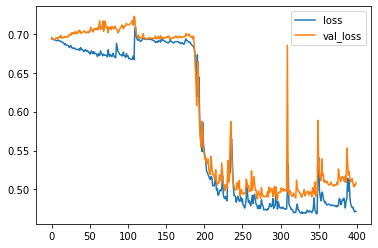

In [76]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

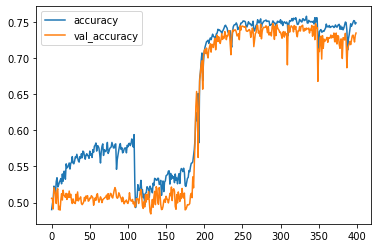

In [77]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [78]:
i=Input(shape=(T,D))
x=LSTM(5, return_sequences=True)(i)
x=GlobalMaxPooling1D()(x) #just remembering important hidden states by taking max in each T
x=Dense(1, activation='sigmoid')(x)
model=Model(i,x)
model.compile(loss='binary_crossentropy',
             optimizer=Adam(lr=0.01),
             metrics=['accuracy'])

NameError: name 'GlobalMaxPooling1D' is not defined

In [ ]:
r=model.fit(inputs, Y, epochs=400, validation_split=0.5)

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()